## Step1.前置作業
#### 讀入標準套件

In [0]:
%matplotlib inline                

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### 讀入Tensorflow

In [0]:
import tensorflow as tf  # 讀入Tensorflow

### Step2. 讀入 MNSIT 數據集

In [0]:
 from tensorflow.keras.datasets import fashion_mnist  #讀入Fashion 版的 MNIST 

In [0]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

### Step3.欣賞數據集內容

In [53]:
len(x_train)

60000

In [54]:
len(x_test)

10000

In [0]:
n=9898  #想看第9898筆資料長怎樣

In [56]:
x_train[n]    #看第9898筆資料長怎樣

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 191,
        204, 209,  62,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 113, 215, 189,
        175, 177, 219, 202,  15,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   8, 234, 238, 236,
        232, 240, 229, 255, 123,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 211, 233, 235,
        238, 237, 225, 247,  85,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 219, 231, 234,
        239, 236, 226, 250, 106,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   3, 234, 229, 233,
        240, 236, 225, 248, 139,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [57]:
y_train[n]   #看y的第9898筆資料

3

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

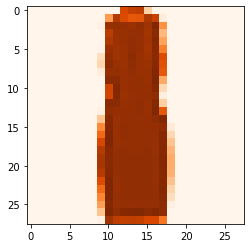

In [58]:
plt.imshow(x_train[n],cmap='Oranges')    #把資料以圖形呈現，橘色

### Step4.資料整理

In [59]:
x_train.shape   

#有60000筆資料，是28x28的矩陣形式，想把它轉換成28x28=784的形式
#28*28=784

(60000, 28, 28)

In [0]:
x_train = x_train.reshape(60000,784)/255
x_test = x_test.reshape(10000,784)/255

#除以255的原因是因為在統計上我們喜歡讓變異數是1。

In [0]:
from tensorflow.keras.utils import to_categorical  

#讀入套件，以便one heart in coding

In [0]:
y_train=to_categorical(y_train,10)   #分10類

In [0]:
y_test=to_categorical(y_test,10)

In [64]:
y_train[9898]    #顯示分類的結果

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Step5.打造神經網路

In [0]:
from tensorflow.keras.models import Sequential #開一個空白的函數學習機
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD   #標準型

In [0]:
model=Sequential()      

#model只是名稱，可以任意換 
#打開學習機

In [0]:
model.add(Dense(180,input_dim=784,activation='relu'))  #第一層

In [0]:
model.add(Dense(180,activation='relu'))   #第二層

In [0]:
model.add(Dense(180,activation='relu')) 

In [0]:
model.add(Dense(180,activation='relu')) 

In [0]:
model.add(Dense(180,activation='relu')) 

In [0]:
model.add(Dense(10,activation='softmax'))    
#最後一層，共10個神經元
#輸出成10個數字，全部限定在0到1中間，而且加起來總合為1

### Step6.組裝神經網路

In [0]:
model.compile(loss='mse',optimizer=SGD(lr=0.09), metrics=['accuracy'])   
#指定learning rate在0.09

In [76]:
model.fit(x_train,y_train,batch_size=100,epochs=20)    

#正確率0.8687

Epoch 1/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0884 - accuracy: 0.1301
Epoch 2/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0846 - accuracy: 0.2418
Epoch 3/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0748 - accuracy: 0.4191
Epoch 4/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0564 - accuracy: 0.5704
Epoch 5/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0434 - accuracy: 0.7058
Epoch 6/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0340 - accuracy: 0.7674
Epoch 7/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0293 - accuracy: 0.8006
Epoch 8/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0272 - accuracy: 0.8154
Epoch 9/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0257 - accuracy: 0.8261
Epoch 10/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0247 - accuracy: 0.8323

In [77]:
model.fit(x_train,y_train,batch_size=100,epochs=20)  

#再跑一次，正確率0.8970

Epoch 1/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0192 - accuracy: 0.8707
Epoch 2/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0188 - accuracy: 0.8721
Epoch 3/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0186 - accuracy: 0.8746
Epoch 4/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0183 - accuracy: 0.8764
Epoch 5/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0181 - accuracy: 0.8787
Epoch 6/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0178 - accuracy: 0.8798
Epoch 7/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0176 - accuracy: 0.8814
Epoch 8/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0174 - accuracy: 0.8827
Epoch 9/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0172 - accuracy: 0.8841
Epoch 10/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0169 - accuracy: 0.8856

In [78]:
model.fit(x_train,y_train,batch_size=100,epochs=20)  

#再跑一次，最終正確率0.9149

Epoch 1/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0152 - accuracy: 0.8992
Epoch 2/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0152 - accuracy: 0.8977
Epoch 3/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0149 - accuracy: 0.8994
Epoch 4/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0147 - accuracy: 0.9020
Epoch 5/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0147 - accuracy: 0.9028
Epoch 6/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0146 - accuracy: 0.9028
Epoch 7/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0145 - accuracy: 0.9031
Epoch 8/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0143 - accuracy: 0.9044
Epoch 9/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0142 - accuracy: 0.9054
Epoch 10/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0141 - accuracy: 0.9065

### Step7.訓練成果


In [79]:
result=model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


神經網路預測是: Bag


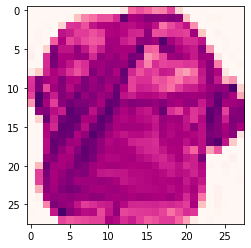

In [88]:
n = 8888
print('神經網路預測是:', class_names[result[n]])
# print('真正的答案是:', [y_test[n]])
plt.imshow(x_test[n].reshape(28,28), cmap='RdPu')

In [87]:
class_names[result[1234]]

'Coat'

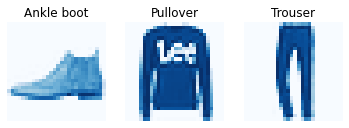

In [98]:
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='Blues')
    plt.title(class_names[result[i]])
    plt.axis("off")